# Loading the data

In [65]:
import pandas as pd

In [66]:
df_emp_data=pd.read_csv("C:/Users/kbaak/Downloads/ML Project/ML case Study.csv",header=0)

In [67]:
df_college_data=pd.read_csv("C:/Users/kbaak/Downloads/ML Project/Colleges.csv",header=0)

In [68]:
df_city_data=pd.read_csv("C:/Users/kbaak/Downloads/ML Project/cities.csv",header=0)

In [69]:
df_emp_data.head()

College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10

In [70]:
df_college_data.head()

Tier 1          Tier 2                                      Tier 3
0     IIT Bombay  IIIT Bangalore  Ramaiah Institute of Technology, Bengaluru
1      IIT Delhi      IIIT Delhi                      TIET/Thapar University
2  IIT Kharagpur          IGDTUW                         Manipal Main Campus
3     IIT Madras     NIT Calicut                                 VIT Vellore
4     IIT Kanpur   IIITM Gwalior                             SRM Main Campus

In [71]:
df_city_data.head()

Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode

# Changing college names into tiers and updating to df_emp_data

In [72]:
# Empty dictionary
college_tiers = {}
for i in range(1, 4):
    # tier name
    tier_name = 'Tier ' + str(i)
    
    # Clean college names and add to dictionary
    cleaned_colleges = df_college_data[tier_name].dropna().str.strip().tolist()
    college_tiers[tier_name] = cleaned_colleges

# Function to get the tier of a college
def get_college_tier(college_name):
    for tier, colleges in college_tiers.items():
        if college_name in colleges:
            return int(tier.split()[-1])
    return 3  

# Check if 'College' column exists in df_emp_data
if 'College' in df_emp_data.columns:
    
    # Apply get_college_tier
    df_emp_data['College Tier'] = df_emp_data['College'].apply(get_college_tier)
    
    # Drop 'College' column from df_emp_data
    df_emp_data.drop('College', axis=1, inplace=True)
    
else:
    print("College' not found")


In [73]:
#df_emp_data updated with tier
df_emp_data.head()

City       Role  Previous CTC  Previous job change  \
0          Asansol    Manager       55523.0                    3   
1            Ajmer  Executive       57081.0                    1   
2  Rajpur Sonarpur  Executive       60347.0                    2   
3            Ajmer  Executive       49010.0                    2   
4         Durgapur  Executive       57879.0                    4   

   Graduation Marks  EXP (Month)       CTC  College Tier  
0                66           19  71406.58             2  
1                84           18  68005.87             2  
2                52           28  76764.02             3  
3                81           33  82092.39             3  
4                74           32  73878.10             1

# changing cities variable into metro and non metro type 

In [74]:
# Create a dictionary for city types
metro_cities = [city.strip() for city in df_city_data['Metrio City'].dropna()]
non_metro_cities = [city.strip() for city in df_city_data['non-metro cities'].dropna()]

city_map = {city: 1 for city in metro_cities}
city_map.update({city: 0 for city in non_metro_cities})

df_emp_data['City Type'] = df_emp_data['City'].map(city_map)
df_emp_data.drop('City', axis=1, inplace=True)


In [59]:
# updated df with City Type
print(df_emp_data)

           Role  Previous CTC  Previous job change  Graduation Marks  \
0       Manager       55523.0                    3                66   
1     Executive       57081.0                    1                84   
2     Executive       60347.0                    2                52   
3     Executive       49010.0                    2                81   
4     Executive       57879.0                    4                74   
...         ...           ...                  ...               ...   
1584  Executive       61285.0                    3                44   
1585  Executive       63140.0                    1                44   
1586  Executive       44907.0                    1                60   
1587  Executive       52054.0                    2                67   
1588    Manager       44353.0                    3                75   

      EXP (Month)       CTC  College Tier  City Type  
0              19  71406.58             2          0  
1              18  68005.

In [75]:
# Create dummy variables to Role column
df_emp_data = pd.get_dummies(df_emp_data, columns=['Role'], drop_first=True)

# updated df_emp_data with Role_Manager
df_emp_data.head()

Previous CTC  Previous job change  Graduation Marks  EXP (Month)       CTC  \
0       55523.0                    3                66           19  71406.58   
1       57081.0                    1                84           18  68005.87   
2       60347.0                    2                52           28  76764.02   
3       49010.0                    2                81           33  82092.39   
4       57879.0                    4                74           32  73878.10   

   College Tier  City Type  Role_Manager  
0             2          0          True  
1             2          0         False  
2             3          0         False  
3             3          0         False  
4             1          0         False

# Handling Missing values 

In [76]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   College Tier         1589 non-null   int64  
 6   City Type            1589 non-null   int64  
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


#### No missing value found

# Handling outliers

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='CTC'>

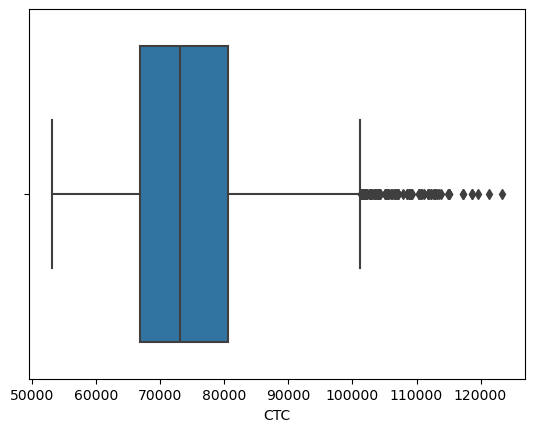

In [78]:
sns.boxplot(x=df_emp_data['CTC'])

In [79]:
#IQR method
Q1 = df_emp_data['CTC'].quantile(0.25)
Q3 = df_emp_data['CTC'].quantile(0.75)
IQR = Q3 - Q1

In [80]:
# Bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [81]:
# Removing outliers
df_emp_data = df_emp_data[(df_emp_data['CTC'] >= lower_bound) & (df_emp_data['CTC'] <= upper_bound)]

<Axes: xlabel='CTC'>

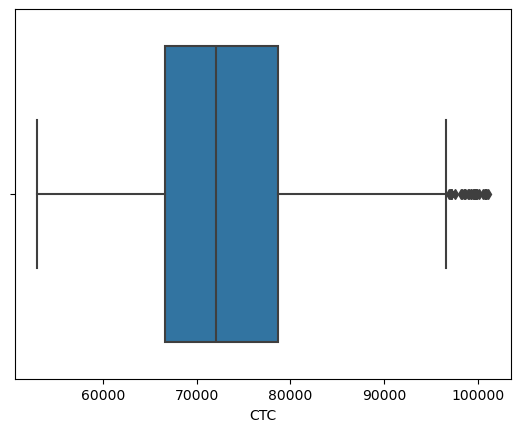

In [28]:
#box plot after removing outliers
sns.boxplot(x=df_emp_data['CTC'])

# Exploratory Data Analysis

## Distribution of CTC

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kbaak\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'frequency')

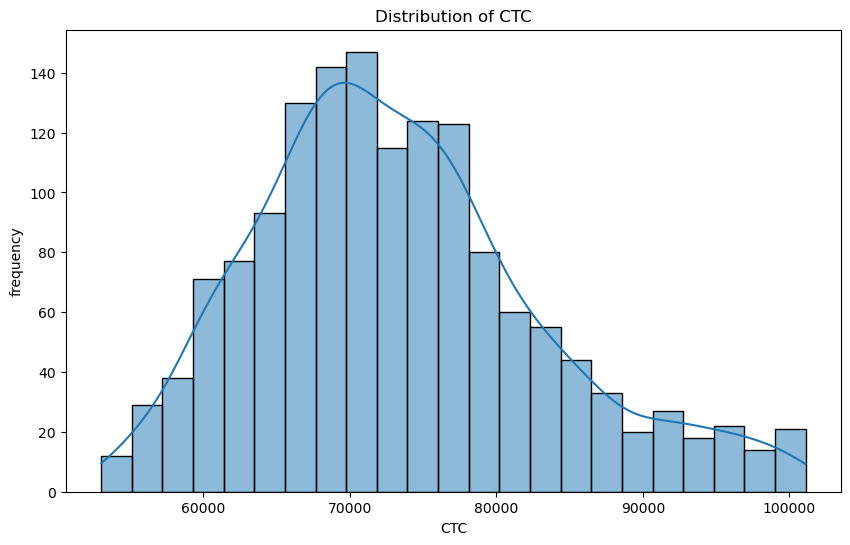

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df_emp_data['CTC'], kde=True)
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('frequency')

### CTC vs Experience

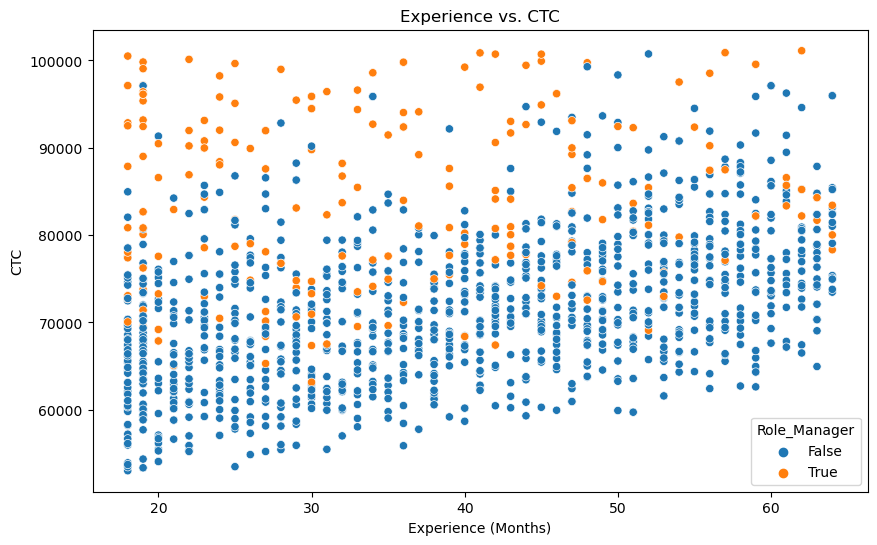

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EXP (Month)', y='CTC', data=df_emp_data, hue='Role_Manager')
plt.title('Experience vs. CTC')
plt.xlabel('Experience (Months)')
plt.ylabel('CTC')
plt.show()

### Correlation Heatmap

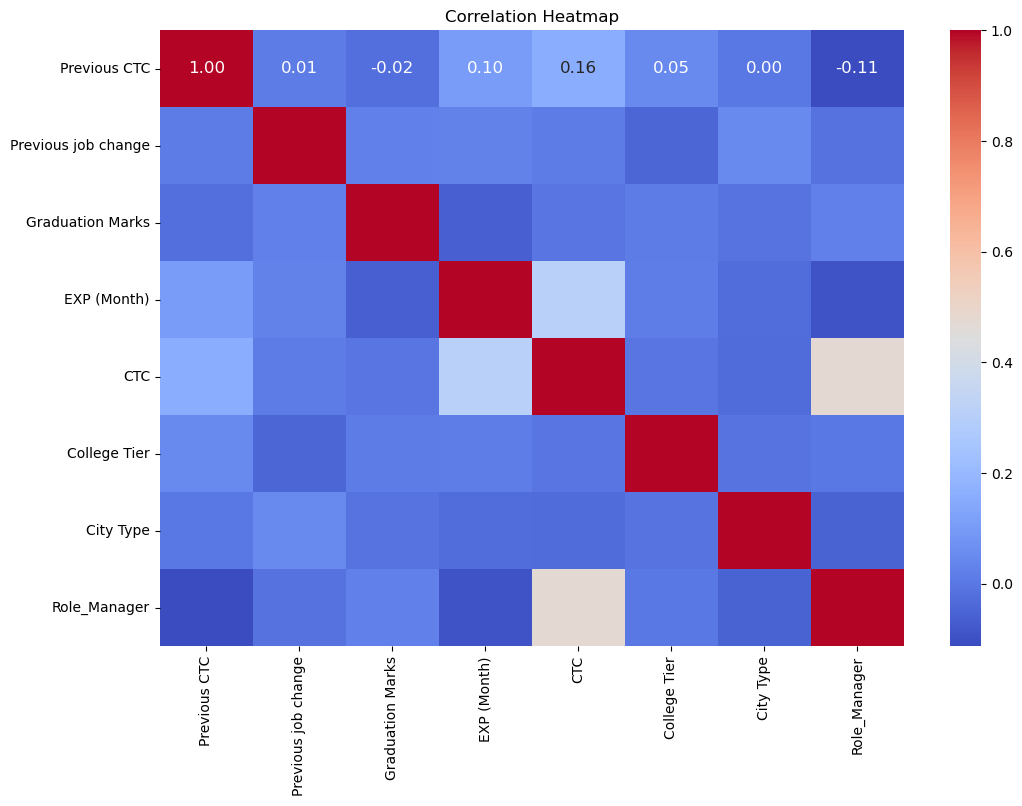

In [119]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_emp_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap')
plt.show()


## Training the regression model

In [85]:
# Prepare the data for training
x = df_emp_data.loc[:,df_emp_data.columns!='CTC']
y=df_emp_data['CTC']

In [86]:
from sklearn.model_selection import train_test_split

In [101]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
print(X_train.shape)

(1196, 7)


In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [102]:
# Make predictions
y_pred = linear_reg.predict(X_test)

In [117]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression r2 Score: {r2}')

Linear Regression Mean Squared Error: 61411030.36409683
Linear Regression r2 Score: 0.37281478693487613


# Decision tree regression

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
# Training the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [114]:
# Make predictions
y_pred_dtree = dt_model.predict(X_test)

# Evaluating the model
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f'Decision Tree Regression Mean Squared Error: {mse_dtree}')
print(f'Decision Tree Regression r2 Score: {r2_dtree}')

Decision Tree Regression Mean Squared Error: 90696604.35035354
Decision Tree Regression r2 Score: 0.07372390942627849


# Random forest regression 
### To improve the performance of decision tree

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
# Makeing predictions
y_pred_rf = rf_model.predict(X_test)

In [109]:
# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [113]:
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')

Random Forest Regression Mean Squared Error: 55247396.19774166
Random Forest Regression R^2 Score: 0.43576341660224294


## Result

#### Linear Regression 
* Mean Squared Error: 61411030.36409683
* R2 Score          : 0.3728147869348761

#### Decision Tree
* Mean Squared Error: 90696604.3503535
* R2 Score: 0.073723909426278494

#### Random Forest
* Mean Squared Error: 55247396.197741
* R2 Score: 0.435763416602242943


#### 1. Your views about the problem statement?
The task is to develop a machine learning model capable of predicting the salaries of newly hired employees based on various factors such as their college, city, role, previous compensation, job changes, graduation marks, and experience. This is a standard regression problem aimed at predicting a continuous outcome, which in this case is the salary.

#### 2. What will be your approach to solving this task?
1. Load and preprocess the data.
2. Perform exploratory data analysis to understand the data distribution and relationships.
3. Handle missing values and outliers.
4. Convert categorical variables into numerical values.
5. Train and evaluate multiple regression models.
6. Select the best model and suggest improve

#### 3. What were the available ML model options you had to perform this task?The  available machine learning model optionsfor the regression models aree- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression (SVR)
- Gradient Boosting Regression
- XGBoost Regre

#### 4. Which model’s performance is best and what could be the possible reason for that?
According to the MSE and R² score, the Random Forest Regression model achieves the best results. This is likely due to Random Forest being an ensemble method that reduces overfitting by averaging the outputs of multiple decision trees, resulting in better generalization on the test data.

#### 5. What steps can you take to improve this selected model’s performance even further?
To improve the regression decision tree performance we can use Random Forest modelssiongressionments.ments.